<a href="https://colab.research.google.com/github/quachhason/portfolio/blob/main/5_Modeling_%26_Advanced_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Reading data from CSV files
cleaned_listings = pd.read_csv('/content/drive/MyDrive/cleaned_data/cleaned_listings_v2.csv')
cleaned_calendars = pd.read_csv('/content/drive/MyDrive/cleaned_data/cleaned_calendars_v2.csv')
daily_metrics = pd.read_csv('/content/drive/MyDrive/cleaned_data/daily_metrics.csv')

# List of cities
cities = daily_metrics['city'].unique()


> **Research Question 3**: What are the key factors influencing Airbnb occupancy rates, and how can they be quantified for forecasting?



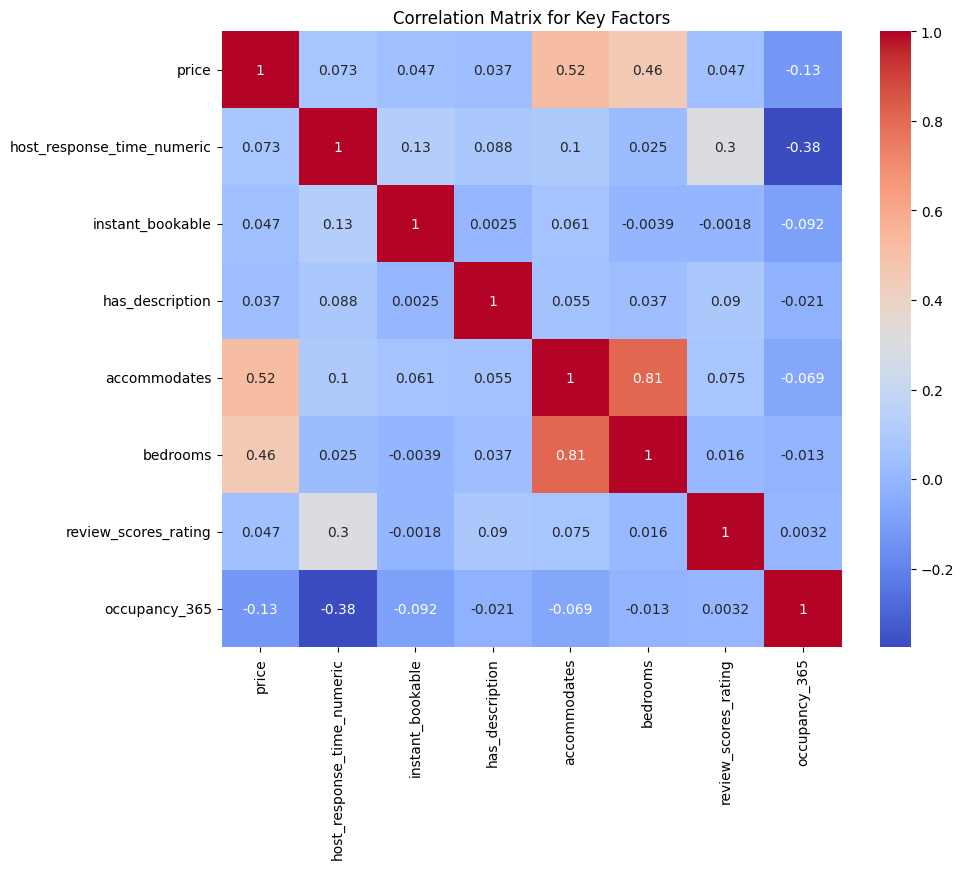

In [2]:
# Correlation Matrix
cleaned_listings['host_response_time_numeric'] = cleaned_listings['host_response_time'].map({'no_response': 0, 'a few days or more': 1, 'within a day': 2, 'within a few hours': 3, 'within an hour': 4})  #Change the string to float for correlation
corr_matrix = cleaned_listings[['price', 'host_response_time_numeric','instant_bookable','has_description', 'accommodates', 'bedrooms', 'review_scores_rating', 'occupancy_365']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Key Factors')
plt.show()

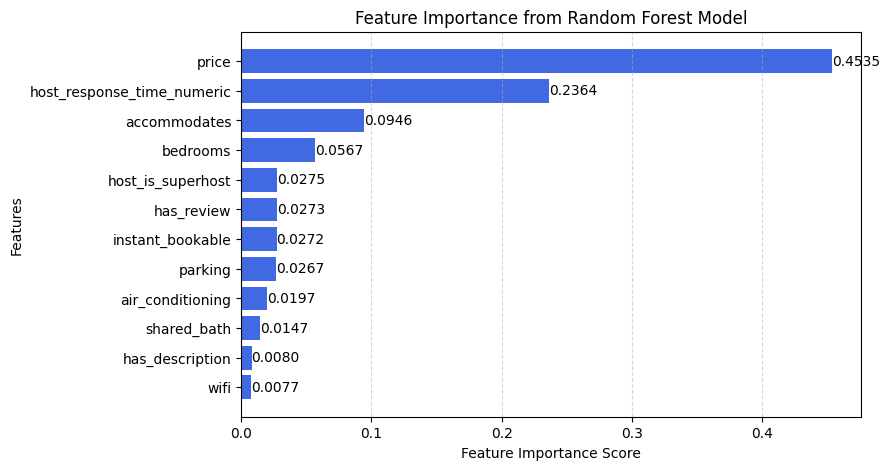

                       Feature  Importance
10                        wifi    0.007701
6              has_description    0.008032
7                  shared_bath    0.014735
9             air_conditioning    0.019726
8                      parking    0.026720
3             instant_bookable    0.027159
11                  has_review    0.027259
2            host_is_superhost    0.027459
5                     bedrooms    0.056733
4                 accommodates    0.094553
1   host_response_time_numeric    0.236426
0                        price    0.453498


In [3]:
# Non-linear Relationship => Use Feature Importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

cleaned_listings['host_response_time_numeric'] = cleaned_listings['host_response_time'].map({'no_response': 0, 'a few days or more': 1, 'within a day': 2, 'within a few hours': 3, 'within an hour': 4})  #Change the string to float for correlation
# Split dataset to features (X) & target (y)
X = cleaned_listings[['price', 'host_response_time_numeric','host_is_superhost','instant_bookable', 'accommodates', 'bedrooms', 'has_description','shared_bath',	'parking',	'air_conditioning',	'wifi',	'has_review']]
y = cleaned_listings['occupancy_365']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Take feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame for Feature Importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)  # Sort để vẽ từ thấp -> cao

# Draw chart for Feature Importance
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')

# Display values per column
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center', fontsize=10)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest Model")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# Print result
print(feature_importance_df)

100%|===================| 6939/6947 [11:46<00:00]       

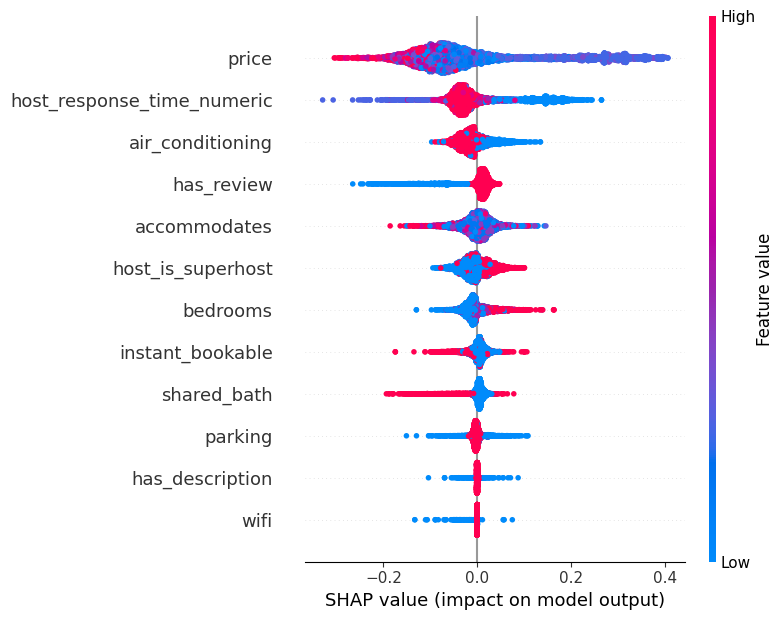

In [4]:
#SHAP VALUES
import shap

# Calculate SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Draw charts for SHAP
shap.summary_plot(shap_values, X_test)


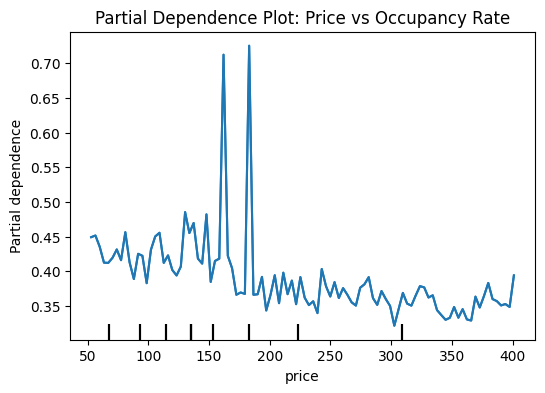

In [5]:
# Partial Dependence Plot (PDP) for Price
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(6, 4))
display = PartialDependenceDisplay.from_estimator(model, X_train, ['price'], ax=ax)
display.plot(ax=display.axes_)
plt.title("Partial Dependence Plot: Price vs Occupancy Rate")
plt.show()


#  **FORECASTING OCCUPANCY RATE IN 2025**

Visualizing forecast for montreal...


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/1yreh_q0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/0xk1ydn5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32718', 'data', 'file=/tmp/tmpklv6q48p/1yreh_q0.json', 'init=/tmp/tmpklv6q48p/0xk1ydn5.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelg89wohu4/prophet_model-20250317164755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:47:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:47:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


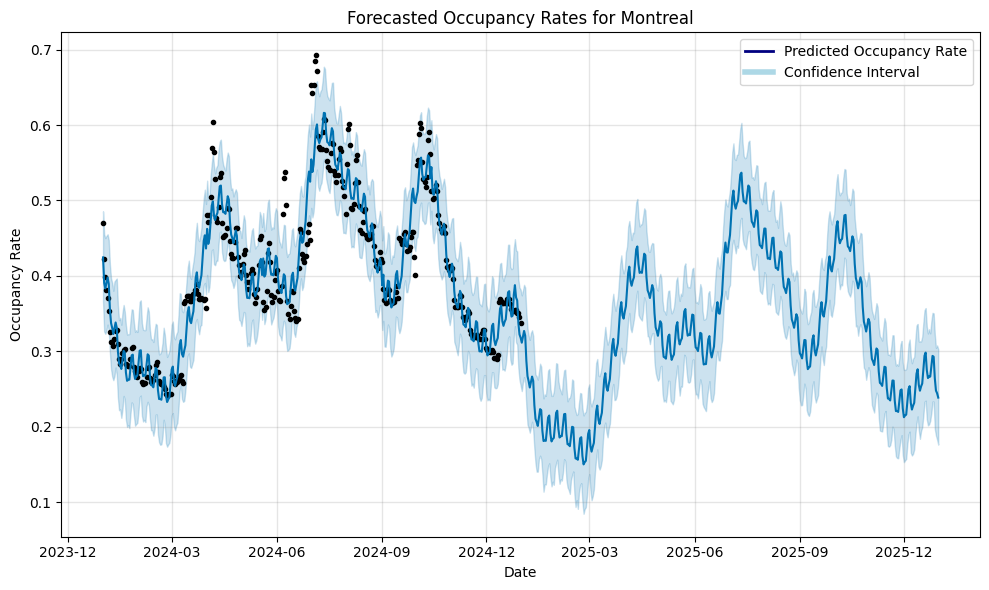

Visualizing forecast for new_brunswick...


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/ifgze0xp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/rr_tfrww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19715', 'data', 'file=/tmp/tmpklv6q48p/ifgze0xp.json', 'init=/tmp/tmpklv6q48p/rr_tfrww.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelhy64_ltw/prophet_model-20250317164758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:47:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:47:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


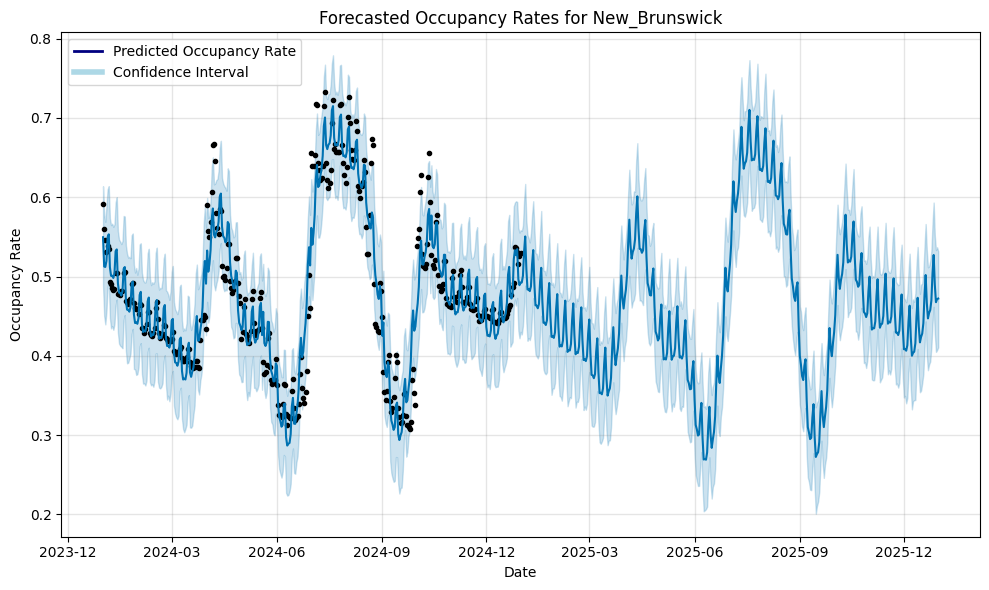

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/i9snyf7y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/565xv409.json
DEBUG:cmdstanpy:idx 0


Visualizing forecast for ottawa...


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66788', 'data', 'file=/tmp/tmpklv6q48p/i9snyf7y.json', 'init=/tmp/tmpklv6q48p/565xv409.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_model7galf2dv/prophet_model-20250317164800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


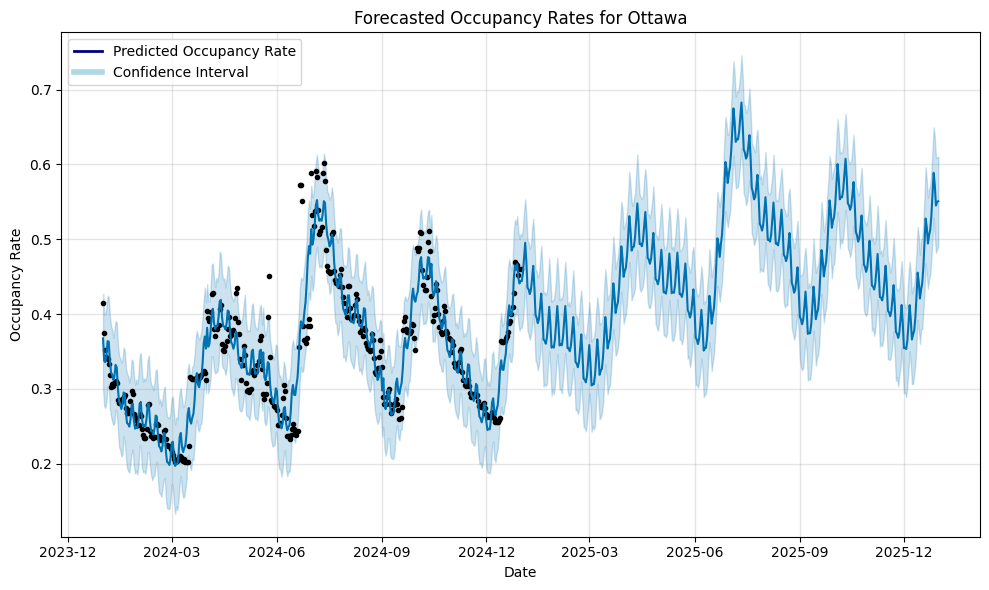

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/9e2is8t5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/p0vijnei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31174', 'data', 'file=/tmp/tmpklv6q48p/9e2is8t5.json', 'init=/tmp/tmpklv6q48p/p0vijnei.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelj0u6cmxg/prophet_model-20250317164802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Visualizing forecast for quebec_city...


16:48:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


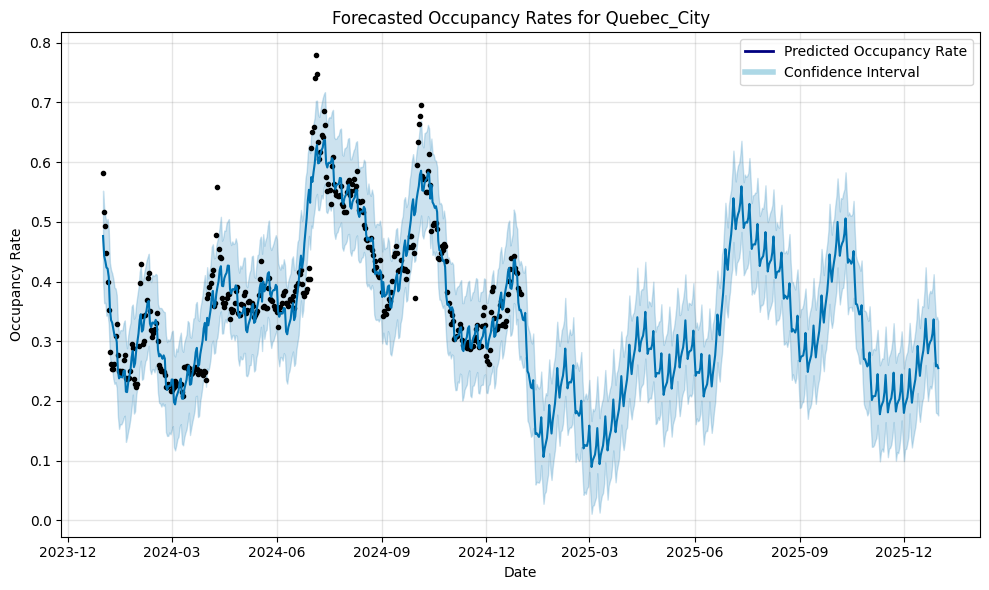

Visualizing forecast for toronto...


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/3f2qnuhg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/om5u83zz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89711', 'data', 'file=/tmp/tmpklv6q48p/3f2qnuhg.json', 'init=/tmp/tmpklv6q48p/om5u83zz.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelnl7d3jrq/prophet_model-20250317164805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


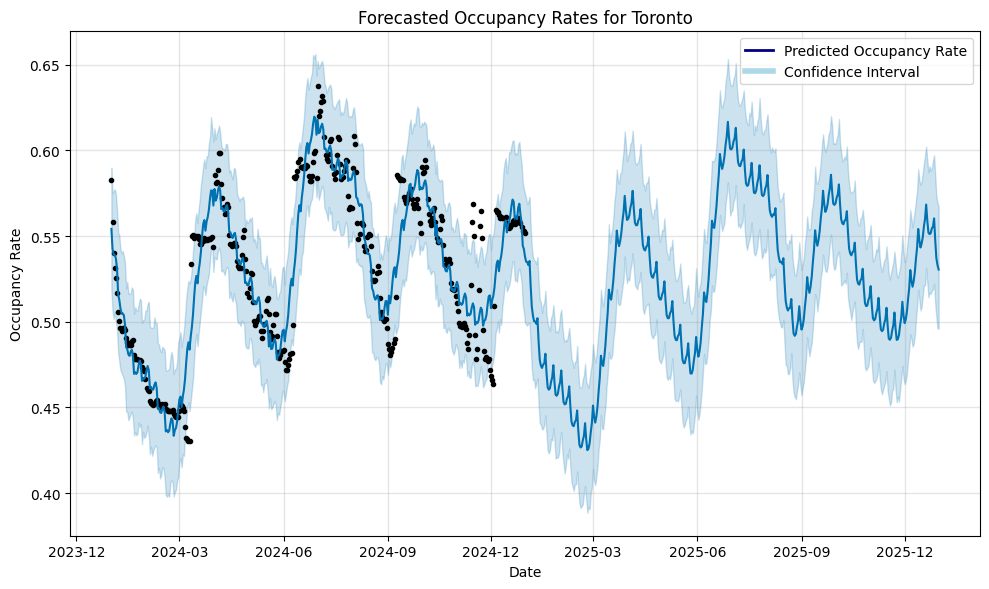

Visualizing forecast for vancouver...


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/gtd_nfwl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/p3fnfk7a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13838', 'data', 'file=/tmp/tmpklv6q48p/gtd_nfwl.json', 'init=/tmp/tmpklv6q48p/p3fnfk7a.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelw41ep4j4/prophet_model-20250317164807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


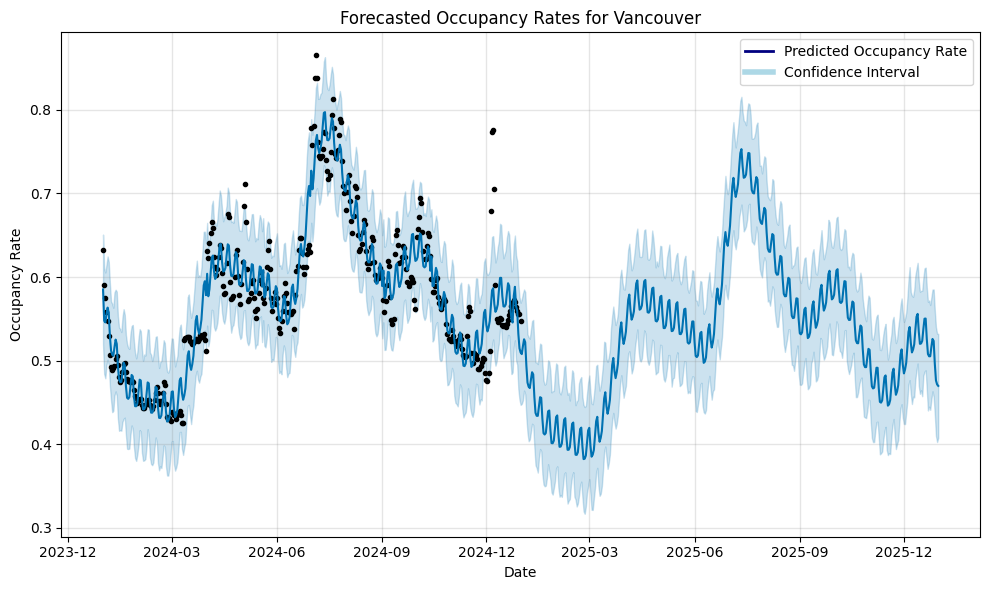

Visualizing forecast for victoria...


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/l2q17ybm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/u_k7rsgr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96602', 'data', 'file=/tmp/tmpklv6q48p/l2q17ybm.json', 'init=/tmp/tmpklv6q48p/u_k7rsgr.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelaa6pz09q/prophet_model-20250317164809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


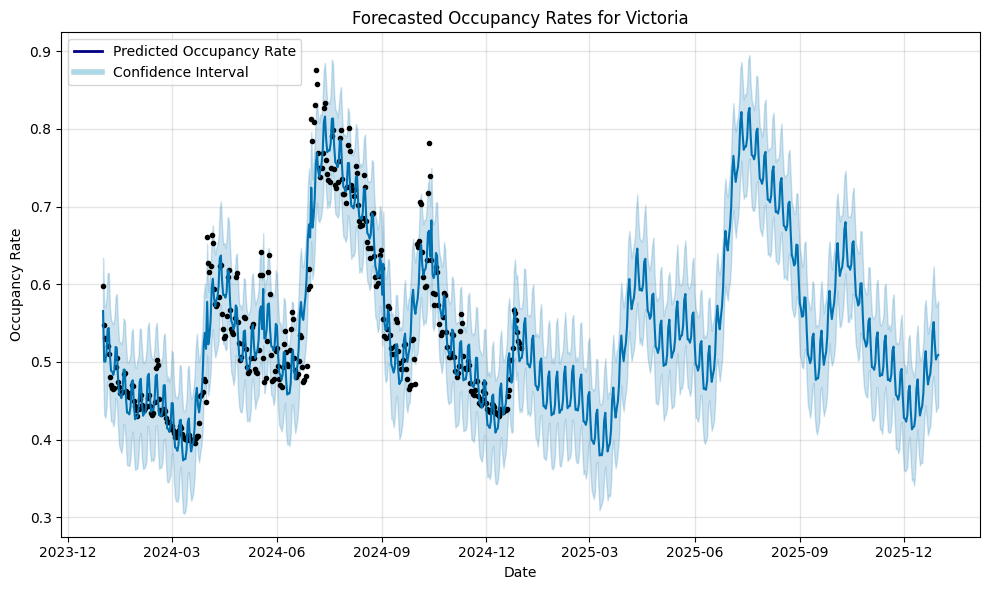

Visualizing forecast for winnipeg...


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/2_ionxv6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/1vhme28f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93105', 'data', 'file=/tmp/tmpklv6q48p/2_ionxv6.json', 'init=/tmp/tmpklv6q48p/1vhme28f.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modeln5rl01py/prophet_model-20250317164812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


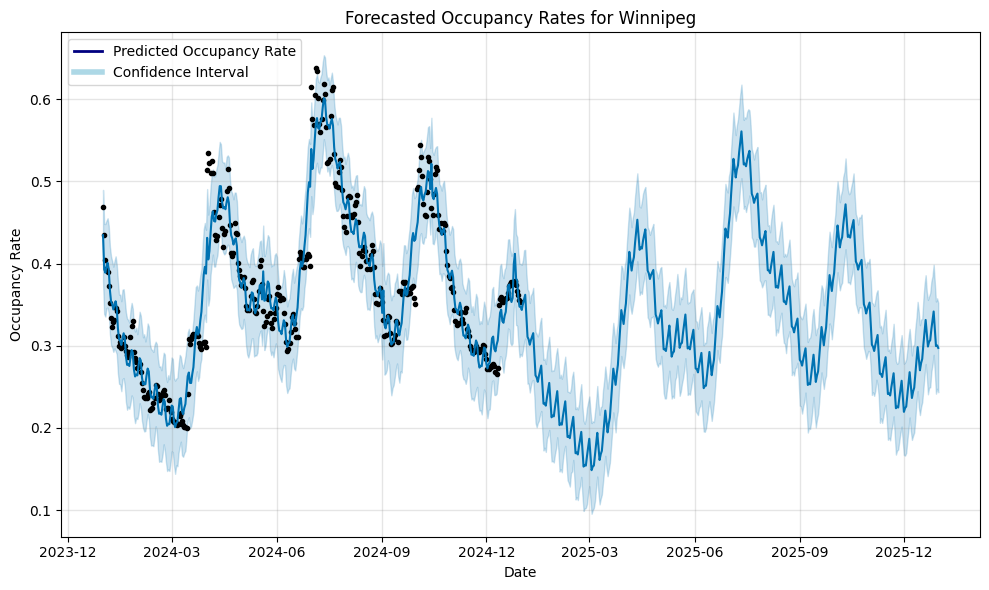

In [6]:
# Build Prophet Model

# Prepares data for Prophet model, including holiday and weekend features.
def prepare_prophet_data(city_name):
    city_data = daily_metrics[daily_metrics['city'] == city_name][['date','occupancy_rate']]
    calendar_features = cleaned_calendars[cleaned_calendars['city'] == city_name][['date','is_holiday','is_weekend']].drop_duplicates()

    # Convert 'date' to datetime before merging
    city_data['date'] = pd.to_datetime(city_data['date'])
    calendar_features['date'] = pd.to_datetime(calendar_features['date'])

    merged = pd.merge(city_data, calendar_features, on='date', how='left')
    merged = merged.rename(columns={'date':'ds', 'occupancy_rate':'y'})

    #fill na values for calendar features
    merged['is_holiday'] = merged['is_holiday'].fillna(0)
    merged['is_weekend'] = merged['is_weekend'].fillna(0)
    return merged

# Creates and trains the Prophet model with holiday and weekend regressors.
def create_and_fit_model(df):
    holidays = df[df['is_holiday'] == 1][['ds']]
    holidays['holiday'] = 'holiday'

    model = Prophet(
        holidays=holidays,
        yearly_seasonality=True,
        weekly_seasonality=True,
        interval_width=0.95 #confidence range

    )
    model.add_regressor('is_weekend')
    model.fit(df[['ds','y','is_weekend']])
    return model


def create_future_dataframe(model, df, periods = 365):
  future = model.make_future_dataframe(periods=periods)
  future['ds'] = pd.to_datetime(future['ds'])
  future = pd.merge(future, df[['ds','is_weekend']].drop_duplicates(subset = ['ds']), on='ds', how='left')
  future['is_weekend'] = future['is_weekend'].fillna(0)
  return future

# Visualizes the forecast results with a confidence interval and customized legend.
def visualize_forecast(model, forecast, city_name):
    fig = model.plot(forecast)
    ax = fig.gca()  # Get the current axes

    # Customize the title and labels, capitalizing the first letter
    formatted_city_name = city_name.title()
    plt.title(f'Forecasted Occupancy Rates for {formatted_city_name}')
    plt.xlabel('Date')
    plt.ylabel('Occupancy Rate')

    # Create custom legend handles
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='navy', lw=2),  # Line Color
                    Line2D([0], [0], color='lightblue', lw=4)]  # Interval Color

    # Add the custom legend
    ax.legend(custom_lines, ['Predicted Occupancy Rate', 'Confidence Interval'])

    plt.tight_layout()
    plt.show()

# Loop through each city
for city in cities:
    print(f"Visualizing forecast for {city}...")
    # Prepare data for the city
    city_data = prepare_prophet_data(city)

    # Create and train the Prophet model
    model = create_and_fit_model(city_data)

    # Create future dataframe to be assessed.
    future = create_future_dataframe(model, city_data, periods = 365)

    # Make predictions
    forecast = model.predict(future)

    # Visualize the forecast
    visualize_forecast(model, forecast, city)

> **Research Question 4**: How accurately can the Prophet model predict Airbnb occupancy rates for holidays and weekends in our selected Canadian cities, and what are the key limitations of the model's performance?

In [7]:
#-- EVALUATE PROPHET MODEL--

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics

def evaluate_prophet_model(city):
    # Prepare data
    city_data = prepare_prophet_data(city)
    model = create_and_fit_model(city_data)

    # Cross-Validation
    df_cv = cross_validation(
        model,
        initial='180 days',
        period='30 days',
        horizon='90 days'
    )
    holiday_mask = df_cv['ds'].isin(cleaned_calendars[cleaned_calendars['is_holiday'] == 1]['date'])
    holiday_mae = np.mean(np.abs(df_cv[holiday_mask]['yhat'] - df_cv[holiday_mask]['y']))
    overall_mae = np.mean(np.abs(df_cv['yhat'] - df_cv['y']))

    # Train-Test Split
    split_point = int(len(city_data) * 0.8)
    train_df = city_data.iloc[:split_point]
    test_df = city_data.iloc[split_point:]

    trained_model = create_and_fit_model(train_df)
    future_test = create_future_dataframe(trained_model, test_df, periods=len(test_df))
    forecast_test = trained_model.predict(future_test)

    y_true = test_df['y'].values
    y_pred = forecast_test['yhat'].values[:len(y_true)]

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    holiday_mape = np.mean(np.abs((df_cv[holiday_mask]['yhat'] - df_cv[holiday_mask]['y']) / df_cv[holiday_mask]['y'])) * 100
    overall_mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    overall_mae = np.mean(np.abs(y_pred - y_true))
    overall_rmse = np.sqrt(np.mean((y_pred - y_true)**2))

#Print Results:
    print(f'''
    📊 {city.upper()} Prophet Model Performance:
    🔹 MAE (CV): {overall_mae:.4f}
    🔹 RMSE (CV): {overall_rmse:.4f}
    🔹 MAPE (CV): {overall_mape:.2f}%
    🔹 Holiday MAE (CV): {holiday_mae:.4f}
    🔹 Holiday MAPE (CV): {holiday_mape:.2f}%
    ''')

# Evaluate for all cities
for city in cities:
    evaluate_prophet_model(city)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/ywyy_5eb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/kvjc8zom.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95081', 'data', 'file=/tmp/tmpklv6q48p/ywyy_5eb.json', 'init=/tmp/tmpklv6q48p/kvjc8zom.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_model7z0ia_9p/prophet_model-20250317164814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2024-07-04 00:00:00 and 2024-10-02 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/564s4go9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/fzbu8uj7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53601', 'data', 'file=/tmp/tmpklv6q48p/564s4go9.json', 'init=/tmp/tmpklv6q48p/fzbu8uj7.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelrumwmy9_/prophet_model-20250317164814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/cgyac_2z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/qz2bhbdb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


    📊 MONTREAL Prophet Model Performance:
    🔹 MAE (CV): 0.0691
    🔹 RMSE (CV): 0.0758
    🔹 MAPE (CV): 18.90%
    🔹 Holiday MAE (CV): 0.2607
    🔹 Holiday MAPE (CV): 65.75%
    


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/89hg7yfy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/dd4gt1dl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72999', 'data', 'file=/tmp/tmpklv6q48p/89hg7yfy.json', 'init=/tmp/tmpklv6q48p/dd4gt1dl.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_model8h7j2yca/prophet_model-20250317164816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2024-07-04 00:00:00 and 2024-10-02 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/dkxu3zdh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/c1ulgf1j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47358', 'data', 'file=/tmp/tmpklv6q48p/dkxu3zdh.json', 'init=/tmp/tmpklv6q48p/c1ulgf1j.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelolixekih/prophet_model-20250317164816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/8d0zq2v2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/wjzdz8t_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


    📊 NEW_BRUNSWICK Prophet Model Performance:
    🔹 MAE (CV): 0.0420
    🔹 RMSE (CV): 0.0577
    🔹 MAPE (CV): 8.62%
    🔹 Holiday MAE (CV): 0.3096
    🔹 Holiday MAPE (CV): 67.72%
    


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/n1mv2p3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/8qn5vo51.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42666', 'data', 'file=/tmp/tmpklv6q48p/n1mv2p3f.json', 'init=/tmp/tmpklv6q48p/8qn5vo51.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelit0akgbp/prophet_model-20250317164818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2024-07-04 00:00:00 and 2024-10-02 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/oznenthw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/h_a2oz6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74183', 'data', 'file=/tmp/tmpklv6q48p/oznenthw.json', 'init=/tmp/tmpklv6q48p/h_a2oz6e.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modely2sswpz5/prophet_model-20250317164819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/l6crzxus.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/b5haog9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


    📊 OTTAWA Prophet Model Performance:
    🔹 MAE (CV): 0.0758
    🔹 RMSE (CV): 0.1045
    🔹 MAPE (CV): 20.27%
    🔹 Holiday MAE (CV): 0.1272
    🔹 Holiday MAPE (CV): 31.99%
    


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/tczik1_k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/6v1is2qu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25709', 'data', 'file=/tmp/tmpklv6q48p/tczik1_k.json', 'init=/tmp/tmpklv6q48p/6v1is2qu.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modeldcln8trs/prophet_model-20250317164821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2024-07-04 00:00:00 and 2024-10-02 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/nv7l8b5c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/j5r1jdje.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49039', 'data', 'file=/tmp/tmpklv6q48p/nv7l8b5c.json', 'init=/tmp/tmpklv6q48p/j5r1jdje.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelqlzin2q5/prophet_model-20250317164821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/zigfe4su.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/ofqp383q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


    📊 QUEBEC_CITY Prophet Model Performance:
    🔹 MAE (CV): 0.0799
    🔹 RMSE (CV): 0.1009
    🔹 MAPE (CV): 21.64%
    🔹 Holiday MAE (CV): 0.4191
    🔹 Holiday MAPE (CV): 103.61%
    


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/zaa8gwet.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/3_4vyuqa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45286', 'data', 'file=/tmp/tmpklv6q48p/zaa8gwet.json', 'init=/tmp/tmpklv6q48p/3_4vyuqa.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modeljqvnp021/prophet_model-20250317164825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2024-07-04 00:00:00 and 2024-10-02 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/_thmj8_0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/4hsawa36.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15184', 'data', 'file=/tmp/tmpklv6q48p/_thmj8_0.json', 'init=/tmp/tmpklv6q48p/4hsawa36.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelqg7e_yf1/prophet_model-20250317164825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/2mn92gr4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/hdgc4ktl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


    📊 TORONTO Prophet Model Performance:
    🔹 MAE (CV): 0.0533
    🔹 RMSE (CV): 0.0674
    🔹 MAPE (CV): 9.75%
    🔹 Holiday MAE (CV): 0.4499
    🔹 Holiday MAPE (CV): 88.24%
    


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/9kikmfd0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/xwwr8b7d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93010', 'data', 'file=/tmp/tmpklv6q48p/9kikmfd0.json', 'init=/tmp/tmpklv6q48p/xwwr8b7d.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_model9i183ipb/prophet_model-20250317164828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2024-07-04 00:00:00 and 2024-10-02 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/sbiha5f9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/okbas98e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38900', 'data', 'file=/tmp/tmpklv6q48p/sbiha5f9.json', 'init=/tmp/tmpklv6q48p/okbas98e.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_model8a2tt5pd/prophet_model-20250317164828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/u4qq1rxd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/5g6yii6f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


    📊 VANCOUVER Prophet Model Performance:
    🔹 MAE (CV): 0.0748
    🔹 RMSE (CV): 0.0981
    🔹 MAPE (CV): 13.06%
    🔹 Holiday MAE (CV): 0.1937
    🔹 Holiday MAPE (CV): 33.45%
    


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/9_11ven8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/yxsapnbm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96020', 'data', 'file=/tmp/tmpklv6q48p/9_11ven8.json', 'init=/tmp/tmpklv6q48p/yxsapnbm.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelggacwqd_/prophet_model-20250317164830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2024-07-04 00:00:00 and 2024-10-02 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/n3vexjx0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/pfu7qbig.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52703', 'data', 'file=/tmp/tmpklv6q48p/n3vexjx0.json', 'init=/tmp/tmpklv6q48p/pfu7qbig.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelj93ew5zq/prophet_model-20250317164830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/cvxks56r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/8jzy2wtb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


    📊 VICTORIA Prophet Model Performance:
    🔹 MAE (CV): 0.0498
    🔹 RMSE (CV): 0.0689
    🔹 MAPE (CV): 9.74%
    🔹 Holiday MAE (CV): 0.3493
    🔹 Holiday MAPE (CV): 60.10%
    


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/8njra0l6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/crgnbw86.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85404', 'data', 'file=/tmp/tmpklv6q48p/8njra0l6.json', 'init=/tmp/tmpklv6q48p/crgnbw86.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelep7k25jy/prophet_model-20250317164833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 4 forecasts with cutoffs between 2024-07-04 00:00:00 and 2024-10-02 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/y8pi0q5v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/m7nqvyic.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90842', 'data', 'file=/tmp/tmpklv6q48p/y8pi0q5v.json', 'init=/tmp/tmpklv6q48p/m7nqvyic.json', 'output', 'file=/tmp/tmpklv6q48p/prophet_modelk9k_4dl9/prophet_model-20250317164833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:48:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:48:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/ti2a3mot.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpklv6q48p/8d75hkkf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/


    📊 WINNIPEG Prophet Model Performance:
    🔹 MAE (CV): 0.0681
    🔹 RMSE (CV): 0.0847
    🔹 MAPE (CV): 19.32%
    🔹 Holiday MAE (CV): 0.2284
    🔹 Holiday MAPE (CV): 58.67%
    


In [8]:
# --EVALUATE XGBOOST MODEL -

import xgboost as xgb
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare data for XGBoost
def prepare_xgboost_data(city_name):
    city_data = daily_metrics[daily_metrics['city'] == city_name][['date', 'occupancy_rate']]
    calendar_features = cleaned_calendars[cleaned_calendars['city'] == city_name][['date', 'is_holiday', 'is_weekend']].drop_duplicates()

    # Convert date into datetime
    city_data['date'] = pd.to_datetime(city_data['date'])
    calendar_features['date'] = pd.to_datetime(calendar_features['date'])

    # Combine features
    merged = pd.merge(city_data, calendar_features, on='date', how='left')
    merged = merged.rename(columns={'date': 'ds', 'occupancy_rate': 'y'})

    # Fill NaN
    merged['is_holiday'] = merged['is_holiday'].fillna(0)
    merged['is_weekend'] = merged['is_weekend'].fillna(0)

    # Create feature time-based
    merged['dayofweek'] = merged['ds'].dt.dayofweek
    merged['month'] = merged['ds'].dt.month
    merged['year'] = merged['ds'].dt.year
    merged['dayofyear'] = merged['ds'].dt.dayofyear

    return merged

def evaluate_xgboost_model(city):
    # Prepare data
    city_data = prepare_xgboost_data(city)
    X = city_data[['is_holiday', 'is_weekend', 'dayofweek', 'month', 'year', 'dayofyear']]
    y = city_data['y']
    # Time Series Cross-Validation
    tscv = TimeSeriesSplit(n_splits=5)
    mae_scores, rmse_scores, mape_scores = [], [], []
    holiday_mae_scores, holiday_mape_scores = [], []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train Model
        model = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=200,
            learning_rate=0.1,
            max_depth=5,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        )
        model.fit(X_train, y_train)

        # Prediction
        y_pred = model.predict(X_test)

        # Calculate metrics in general
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        mae_scores.append(mae)
        rmse_scores.append(rmse)
        mape_scores.append(mape)

        # Calculate metrics for holiday
        holiday_mask = X_test['is_holiday'] == 1
        if sum(holiday_mask) > 0:
            holiday_mae = mean_absolute_error(y_test[holiday_mask], y_pred[holiday_mask])
            holiday_mape = np.mean(np.abs((y_test[holiday_mask] - y_pred[holiday_mask]) / y_test[holiday_mask])) * 100
            holiday_mae_scores.append(holiday_mae)
            holiday_mape_scores.append(holiday_mape)

    # Result
    print(f'''
    📊 {city.upper()} XGBoost Model Performance:
    🔹 MAE (CV): {np.mean(mae_scores):.4f}
    🔹 RMSE (CV): {np.mean(rmse_scores):.4f}
    🔹 MAPE (CV): {np.mean(mape_scores):.2f}%
    🔹 Holiday MAE (CV): {np.mean(holiday_mae_scores):.4f}
    🔹 Holiday MAPE (CV): {np.mean(holiday_mape_scores):.2f}%
    ''')

# Evaluate for cities
for city in cities:
  evaluate_xgboost_model(city)


    📊 MONTREAL XGBoost Model Performance:
    🔹 MAE (CV): 0.0845
    🔹 RMSE (CV): 0.0992
    🔹 MAPE (CV): 19.66%
    🔹 Holiday MAE (CV): 0.1166
    🔹 Holiday MAPE (CV): 24.10%
    

    📊 NEW_BRUNSWICK XGBoost Model Performance:
    🔹 MAE (CV): 0.0627
    🔹 RMSE (CV): 0.0746
    🔹 MAPE (CV): 13.58%
    🔹 Holiday MAE (CV): 0.1020
    🔹 Holiday MAPE (CV): 18.75%
    

    📊 OTTAWA XGBoost Model Performance:
    🔹 MAE (CV): 0.0771
    🔹 RMSE (CV): 0.0916
    🔹 MAPE (CV): 21.71%
    🔹 Holiday MAE (CV): 0.1172
    🔹 Holiday MAPE (CV): 26.98%
    

    📊 QUEBEC_CITY XGBoost Model Performance:
    🔹 MAE (CV): 0.0628
    🔹 RMSE (CV): 0.0821
    🔹 MAPE (CV): 15.00%
    🔹 Holiday MAE (CV): 0.0933
    🔹 Holiday MAPE (CV): 20.44%
    

    📊 TORONTO XGBoost Model Performance:
    🔹 MAE (CV): 0.0548
    🔹 RMSE (CV): 0.0617
    🔹 MAPE (CV): 9.99%
    🔹 Holiday MAE (CV): 0.0686
    🔹 Holiday MAPE (CV): 11.83%
    

    📊 VANCOUVER XGBoost Model Performance:
    🔹 MAE (CV): 0.0578
    🔹 RMSE (CV): 0.

1️⃣ Overall Performance Comparison
Prophet generally has lower MAE and RMSE values, indicating better accuracy in most cities, especially in Montreal, New Brunswick, Ottawa, Toronto, Vancouver, and Victoria.
XGBoost performs better in Quebec City and performs similarly in some cases (e.g., Toronto, Vancouver).

2️⃣ MAPE (Mean Absolute Percentage Error) Observations
Prophet exhibits slightly lower MAPE (CV) in most cities, meaning its predictions are generally more accurate in percentage terms.
However, for Holiday MAPE (CV), Prophet has much higher errors, especially in Quebec City (103.61%), Toronto (88.24%), Victoria (60.10%), and Winnipeg (58.67%). This suggests Prophet struggles with capturing seasonal variations during holidays.
XGBoost consistently shows lower Holiday MAPE values, making it a better model for forecasting occupancy on holidays.

3️⃣ Holiday-Specific Performance
Prophet has significantly higher errors during holidays, as seen in cities like New Brunswick (67.72%), Quebec City (103.61%), Toronto (88.24%), and Victoria (60.10%).
XGBoost has much better holiday performance, with notably lower Holiday MAE and Holiday MAPE values.

4️⃣ Key Takeaways for Model Selection

✅ If general accuracy is the priority, Prophet is a better choice due to lower overall MAE and RMSE.

✅ If holiday predictions are crucial, XGBoost is superior, as it captures holiday patterns better.

✅ For cities like Quebec City and Winnipeg, XGBoost outperforms Prophet in both general and holiday performance.